In [1]:
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.2, style="white")
import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

In [2]:
# Load and clean data
bitcoin = pd.read_csv('../data/BTC-USD.csv')
bitcoin.columns = bitcoin.columns.str.lower().str.replace(' ','_')
bitcoin['currency'] = "BTC"

ethereum = pd.read_csv('../data/ETH-USD.csv')
ethereum.columns = ethereum.columns.str.lower().str.replace(' ','_')
ethereum['currency'] = "ETH"

crypto = pd.concat([bitcoin, ethereum], ignore_index=True)
crypto['date'] = pd.to_datetime(crypto['date'])
crypto

,date,open,high,low,close,adj_close,volume,currency
0,2015-01-01,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912,BTC
1,2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700,BTC
2,2015-03-01,254.283005,300.044006,236.514999,244.223999,244.223999,959098300,BTC
3,2015-04-01,244.223007,261.798004,214.873993,236.145004,236.145004,672338700,BTC
4,2015-05-01,235.938995,247.804001,228.572998,230.190002,230.190002,568122600,BTC
...,...,...,...,...,...,...,...,...
174,2023-07-01,1933.323853,2026.204956,1832.025391,1856.162354,1856.162354,177596680398,ETH
175,2023-08-01,1856.190186,1877.511475,1551.713257,1645.639160,1645.639160,168678383229,ETH
176,2023-09-01,1645.581299,1692.531128,1533.426758,1671.161865,1671.161865,134781867370,ETH
177,2023-10-01,1671.161499,1865.095215,1523.237549,1816.458984,1816.458984,192662877051,ETH


In [3]:
btc_max = crypto[crypto['currency'] == 'BTC']['adj_close'].max()
eth_max = crypto[crypto['currency'] == 'ETH']['adj_close'].max()
crypto['adj_close_norm'] = crypto.apply(lambda row: row['adj_close'] / btc_max if row['currency'] == 'BTC' else row['adj_close'] / eth_max, axis=1)

In [4]:
gpu = pd.read_csv('../data/gpu_prices.csv')

#change timestamp to data
gpu['timestamp'] = pd.to_datetime(gpu['timestamp'], unit='ms')

#make sure gpu price is numeric
gpu['price'] = pd.to_numeric(gpu['price'], errors='coerce')

gpu

,timestamp,price,null,model
0,2020-11-09 08:00:00,0.00,NaN,Geforce GTX 960
1,2020-11-16 08:00:00,99.99,NaN,Geforce GTX 960
2,2020-11-23 08:00:00,99.99,NaN,Geforce GTX 960
3,2020-11-30 08:00:00,99.99,NaN,Geforce GTX 960
4,2020-12-07 08:00:00,99.99,NaN,Geforce GTX 960
...,...,...,...,...
6432,2023-10-09 07:00:00,140.00,NaN,Radeon RX 5700 XT
6433,2023-10-16 07:00:00,117.50,NaN,Radeon RX 5700 XT
6434,2023-10-23 07:00:00,154.50,NaN,Radeon RX 5700 XT
6435,2023-10-30 07:00:00,157.50,NaN,Radeon RX 5700 XT


In [5]:
grouped_df = gpu.groupby('model')

#model list
models = gpu['model'].unique().tolist()

# Create a dictionary to store DataFrames for each model
model_dfs = {}

# Iterate through the groups and store DataFrames in the dictionary
for model, group in grouped_df:
    model_dfs[model] = group.copy()

# there are 3 prices for each moth of a model. Calculate mean and reduece it
# so that each model has one price for each month. And then, normalize the price
for model in models:
    model_dfs[model]['date'] = model_dfs[model]['timestamp'].dt.to_period('M')
    model_dfs[model] = model_dfs[model].groupby('date')['price'].mean().reset_index()
    model_dfs[model]['currency'] = model
    max_prices = model_dfs[model]['price'].max()
    model_dfs[model]['adj_close_norm'] = model_dfs[model]['price'] / max_prices
    model_dfs[model]['date'] = model_dfs[model]['date'].astype('datetime64[ns]')
    

model_dfs['Geforce GTX 1060']

,date,price,currency,adj_close_norm
0,2020-11-01,188.5650,Geforce GTX 1060,0.672750
1,2020-12-01,240.3200,Geforce GTX 1060,0.857398
2,2021-01-01,236.3175,Geforce GTX 1060,0.843118
3,2021-02-01,242.6050,Geforce GTX 1060,0.865550
4,2021-03-01,194.3520,Geforce GTX 1060,0.693396
5,2021-04-01,233.3625,Geforce GTX 1060,0.832575
6,2021-05-01,236.1740,Geforce GTX 1060,0.842606
7,2021-06-01,236.6000,Geforce GTX 1060,0.844126
8,2021-07-01,239.0575,Geforce GTX 1060,0.852893
9,2021-08-01,263.3200,Geforce GTX 1060,0.939456


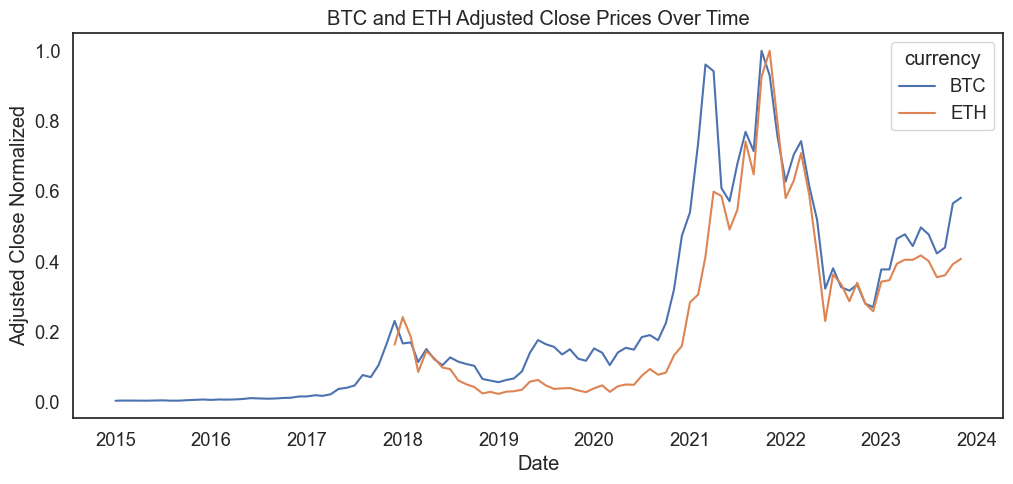

In [6]:
df = crypto.copy()
df['date'] = pd.to_datetime(df['date'])
#df['date'] = df['date'].dt.to_period('M')
#df
sns.lineplot(data=df, x='date', y='adj_close_norm', hue='currency')
plt.title('BTC and ETH Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Normalized')

plt.show()

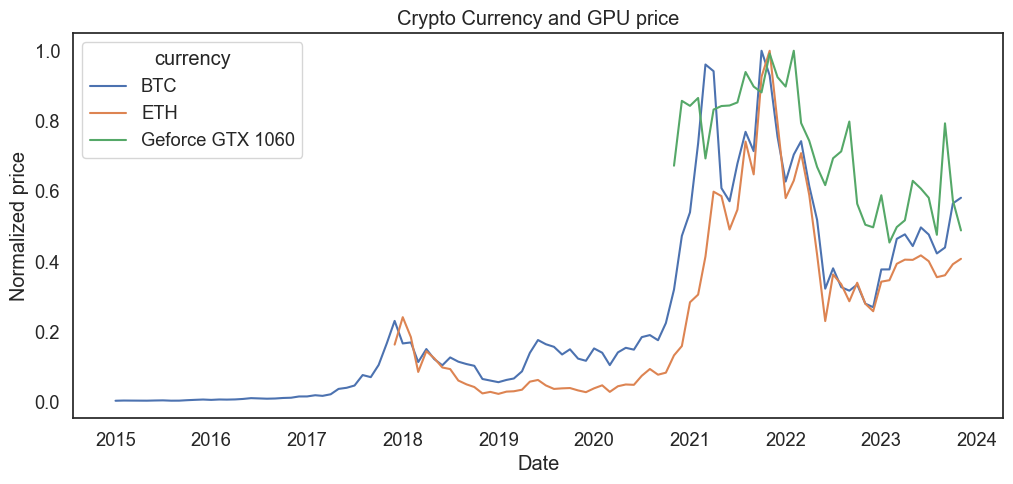

In [7]:
df1 = pd.concat([crypto, model_dfs['Geforce GTX 1060']])
sns.lineplot(data=df1, x='date', y='adj_close_norm', hue='currency')
plt.title('Crypto Currency and GPU price')
plt.xlabel('Date')
plt.ylabel('Normalized price')
plt.show()